In [2]:
%run functions.ipynb
import pdg
plt.rcParams['font.family'] = 'DejaVu Sans'

df_chg = pd.read_pickle('DlKKs_chgMC_df.p')
df_mix = pd.read_pickle('DlKKs_mixMC_df.p')
df_cc = pd.read_pickle('DlKKs_ccMC_df.p')
df_uds = pd.read_pickle('DlKKs_udsMC_df.p')
df_off = pd.read_pickle('DlKKs_off_df.p')
df_dat = pd.read_pickle('DlKKs_data_df.p')
#---------------------------------- Data lumi = 365.290, BB cross-section = 1050000.0, Offpeak lumi = 42.740
df_cc2 = pd.read_pickle('old/DlKKs_ccMC_df.p')
df_chg2 = pd.read_pickle('old/DlKKs_chgMC_df.p')
df_mix2 = pd.read_pickle('old/DlKKs_mixMC_df.p')
df_dat2 = pd.read_pickle('old/DlKKs_data_df.p')
#--------------------------------- Generic MC lumi = 1461.16, wtMC = 0.250, wtMCOff = 0.029
datasmc = [df_chg,df_mix,df_cc,df_uds]
df_names = [r"$B^+B^-$", r"$B^0\bar{B}^0$", r"$c\bar{c}$", r"light $q\bar{q}$ ($u,d,s$)", r"off-resonance"]
datasmc_old = [df_chg2,df_mix2,df_cc2] #3.99 more data 
api = pdg.connect()



def assign_sig(df,mode1 = 'Bplus', mode2 = 'Bminus'): #for sorting decay toplogies
    
    df['signal'+mode1] = df['a'+mode1+'Mode'].where(df['eSL_charge'] < 0, other=pd.NA)
    df['McMatch_eSL'] = df['eSL_PDG'] == df['eSL_mcPDG']
    df['signal'+mode2] = df['a'+mode2+'Mode'].where(df['eSL_charge'] > 0, other=pd.NA)
    #df['McMatchBM'] = df['aBplu'].where(df['eSL_charge'] > 0, other=pd.NA)
assign_sig(df_chg)
assign_sig(df_mix,'B0','Bbar0')
assign_sig(df_cc)
assign_sig(df_uds)
df_chg[60:120]
# df_chg['McMatchBP'].value_counts(),df_mix['McMatchBP'].value_counts(),df_cc['McMatchBP'].value_counts() #0.968539856
# count = ((df_cc['eSL_PDG'] > 0) & (df_cc['eSL_charge'] != -1)).sum() eSL PDG correctly corresponds to eSL charge sign
# df_chg['eSL_charge'].value_counts()
df_cc['eSL_mcPDG'].value_counts()
# 1.0    130492
#-1.0    127962
df_chg['signalBplus'].value_counts().head(40).index

df_chg['signalBminus'].value_counts().head(40)



mode_count = 20
size0 = len(df_chg['signalBplus'].value_counts())
pairs = [(start, min(start + mode_count, size0)) for start in range(0, size0, mode_count)]
pairs = pairs[:19]

width0 = 0.5
fig0, ax0s = plt.subplots(10, 2, figsize=(40, 140))
ax0s = ax0s.flatten()[:19]

i = 0
for start, stop in pairs:
    vc = df_chg['signalBplus'].value_counts().iloc[start:stop]
    labs = vc.index
    positions = np.arange(len(labs)) * 1.8

    k0ss, fakes, k0ss_bm, fakes_bm = [], [], [], []
    for mode in labs:
        subset_bp = df_chg[df_chg['signalBplus'] == mode]
        k0s_bp = (subset_bp['K0S_mcPDG'] == 310).sum()
        fake_bp = len(subset_bp) - k0s_bp
        k0ss.append(k0s_bp)
        fakes.append(fake_bp)

        subset_bm = df_chg[df_chg['signalBminus'] == -mode]
        k0s_bm = (subset_bm['K0S_mcPDG'] == 310).sum()
        fake_bm = len(subset_bm) - k0s_bm
        k0ss_bm.append(k0s_bm)
        fakes_bm.append(fake_bm)

    k0ss = np.array(k0ss)
    fakes = np.array(fakes)
    k0ss_bm = np.array(k0ss_bm)
    fakes_bm = np.array(fakes_bm)

    ax0s[i].bar(positions - width0 / 2, k0ss, width=width0, label='signalBP with True K0S', color='#0b3d91')
    ax0s[i].bar(positions - width0 / 2, fakes, width=width0, bottom=k0ss, label='signalBP with Fake K0S', color='#87cefa')
    ax0s[i].bar(positions + width0 / 2, k0ss_bm, width=width0, label='signalBM with True K0S', color='#d2691e')
    ax0s[i].bar(positions + width0 / 2, fakes_bm, width=width0, bottom=k0ss_bm, label='signalBM with Fake K0S', color='#ffd700')
    ymin, ymax = ax0s[i].get_ylim()
    yticks = np.linspace(ymin, ymax, num=mode_count)
    yticks = np.round(yticks).astype(int)
    yticks = np.unique(yticks)
    ax0s[i].set_yticks(yticks)
    ax0s[i].set_xticks(positions)
    ax0s[i].set_xticklabels(labs.astype(str), rotation=90, ha='center')
    for tick in ax0s[i].get_xticklabels():
        tick.set_y(0.012)
    max_height = max(
    np.max(k0ss + fakes),
    np.max(k0ss_bm + fakes_bm)
    )
    ax0s[i].set_ylim(0, max_height * 1.1)
    ax0s[i].set_title(f"Top Decay Mode Range: {start+1} to {stop}", fontsize=20)
    ax0s[i].legend(fontsize=16, loc='upper right', frameon=False)
    ax0s[i].grid(axis='y', linestyle='--', alpha=0.5)
    ax0s[i].tick_params(axis='x', direction='inout')

    left_edge = positions[0] - width0
    right_edge = positions[-1] + width0
    ax0s[i].set_xlim(left_edge, right_edge)
    i += 1

fig0.suptitle("Top (descending) Weighted signalBP and signalBM Decay Modes with K0S Truth Content", fontsize=28, y=1.02)
fig0.supylabel("Events In Decay Mode", fontsize=34,x=-0.01,y=0.9)
fig0.supxlabel("Decay Modes", y=0)
plt.tight_layout()
plt.show()


#Big note, does not include N0dddd as no FSR decay modes in dataframe via max/min function
had_ranges = list(range(1081, 1085)) + list(range(1798, 1811))
decay_sectors_bp = {
    "semileptonic": {"range": range(1001, 1081), "events": 0},
    "hadronic": {"range": had_ranges, "events": 0},
    "radiative decays": {"range": range(1085, 1093), "events": 0},
    "electroweak penguin": {"range": range(1093, 1110), "events": 0}, #Possibility at least, could be wrong. Documentation misleading
    "leptonic": {"range": range(1110, 1113), "events": 0}, 
    "hadronic charmless": {"range": range(1113, 1609), "events": 0},
    "charmonium": {"range": range(1609, 1680), "events": 0},
    "charm mesons": {"range": range(1680, 1798), "events": 0},
    "baryonic": {"range": range(1811, 1830), "events": 0},
    "null": {"range": [-99], "events": 0},
    "daughters": {"range": range(1,1001), "events": 0}}

decay_sectors_bm = {
    "semileptonic": {"range": range(-1001, -1081,-1), "events": 0},
    "hadronic": {"range": [-elt for elt in had_ranges], "events": 0},
    "radiative decays": {"range": range(-1085, -1093,-1), "events": 0},
    "electroweak penguin": {"range": range(-1093, -1110,-1), "events": 0},
    "leptonic": {"range": range(-1110, -1113,-1), "events": 0},
    "hadronic charmless": {"range": range(-1113, -1609,-1), "events": 0},
    "charmonium": {"range": range(-1609, -1680,-1), "events": 0},
    "charm mesons": {"range": range(-1680, -1798,-1), "events": 0},
    "baryonic": {"range": range(-1811, -1830,-1), "events": 0},
    "null": {"range": [-99], "events": 0},
    "daughters": {"range": range(-1,-1001,-1), "events": 0}}

vcbp = df_chg['signalBplus'].value_counts()
vcbm = df_chg['signalBminus'].value_counts()
total_bp = sum(vcbp)    
total_bm = sum(vcbm)
total_bpm = total_bp+total_bm
com_sec_bp, com_sec_bm,com_sec, decays_bpm = {},{},{}, {}

for mode, events in vcbp.items():
    for sector, ranges in decay_sectors_bp.items():
        if mode in ranges["range"]:
            decay_sectors_bp[sector]["events"] += events
            break
for mode, events in vcbm.items():
    for sector, ranges in decay_sectors_bm.items():
        if mode in ranges["range"]:
            decay_sectors_bm[sector]["events"] += events
            break

for key in decay_sectors_bm: #Same key as BP always here 
    com_sec[key] = (decay_sectors_bm[key]['events']+decay_sectors_bp[key]['events'])/total_bpm*100 
    com_sec_bp[key] = [decay_sectors_bp[key]['events']/total_bp*100,decay_sectors_bp[key]['events']/total_bpm*100] #divide by total charged b signals. Now, becareful. Also consider not over counting events?
    com_sec_bm[key] = [decay_sectors_bm[key]['events']/total_bm*100,decay_sectors_bm[key]['events']/total_bpm*100] #Consider dividing by tot rows instead incase a row has no signal but is an event candidate

for sector, key1 in (decay_sectors_bp.items()):
    keykeys = tuple(key1['range']) + tuple(decay_sectors_bm.get(sector).get('range'))
    decays_bpm[sector] = [{keykey:
            ((int(vcbp[keykey]) + int(vcbm[keykey]))*100/total_bpm if keykey == -99 and keykey in vcbp.index and keykey in vcbm.index 
            else (int(vcbp[keykey])*100/total_bpm if keykey in vcbp.index else int(vcbm[keykey])*100/total_bpm if keykey in vcbm.index else 0))
            for keykey in keykeys}, (sum(int(vcbp[keykey]) if keykey in vcbp.index else 0 for keykey in keykeys) + 
            sum(int(vcbm[keykey]) if keykey in vcbm.index else 0 for keykey in keykeys))*100/total_bpm] #careful of two totals incase no signal rows, event ovc etc. 

"---- Is signal selection attempt"
vcbp_sigk = df_chg.query('K0S_isSignal == 1.0')['signalBplus'].value_counts()
vcbm_sigk = df_chg.query('K0S_isSignal == 1.0')['signalBminus'].value_counts()
decays_bpm_sigk = {}
for sector, key1 in (decay_sectors_bp.items()):
    keykeys = tuple(key1['range']) + tuple(decay_sectors_bm.get(sector).get('range'))
    decays_bpm_sigk[sector] = [{keykey:
            ((int(vcbp_sigk[keykey]) + int(vcbm_sigk[keykey])) if keykey == -99 and keykey in vcbp_sigk.index and keykey in vcbm_sigk.index 
            else (int(vcbp_sigk[keykey]) if keykey in vcbp_sigk.index else int(vcbm_sigk[keykey]) if keykey in vcbm_sigk.index else 0))
            for keykey in keykeys}, (sum(int(vcbp_sigk[keykey]) if keykey in vcbp_sigk.index else 0 for keykey in keykeys) + 
            sum(int(vcbm_sigk[keykey]) if keykey in vcbm_sigk.index else 0 for keykey in keykeys))]
    decays_bpm_sigk[sector].append(df_chg['signalBplus'].isin(keykeys) | df_chg['signalBminus'].isin(keykeys))
    
#NOTE: Mismatch on daughters percentage so far with com_sec. Looks like FP prec err
#Observed does not include daughters or Null/Not found/broken modes
obs_mods = set(vcbp.index) | set(vcbm.index)
obs_mods = obs_mods - set(range(-1000,1001)) 
obs_bp = {mod for mod in obs_mods if mod > 0}
obs_bm = {mod for mod in obs_mods if mod < 0}
missing_mods_bp = set(range(1001,1828))
missing_mods_bm = set(range(-1828,-1000))
missing_mods_bp -= obs_bp #All possible modes minus all observed modes, both from 1001 to 1827 possible, 827 modes
missing_mods_bm -= obs_bm
missing_mods = missing_mods_bp | missing_mods_bm
observ_percs = (len(obs_bp)*100/(len(missing_mods_bp)+len(obs_bp)), len(obs_bm)*100/(len(missing_mods_bm)+len(obs_bm)), len(obs_mods)*100/(len(missing_mods)+len(obs_mods)))

ovw_sigbpm = {cat:sum(com_sec[mode] for mode in modes) for cat, modes in { #Condense
    "semileptonic": ["semileptonic"],
    "ew/leptonic/radiative/rare": ["leptonic","radiative decays","electroweak penguin"],
    "hadronic": ["hadronic","hadronic charmless","baryonic","charmonium","charm mesons"], #double check later
    "unclassified": ["daughters","null"]}.items()}

ovw_sigbpm_sigk0s = {cat:sum(sum(decays_bpm_sigk[sector][0].values()) for sector in sectors)/170550*100 for cat, sectors in {
    "semileptonic": ["semileptonic"],
    "ew/leptonic/radiative/rare": ["leptonic","radiative decays","electroweak penguin"],
    "hadronic": ["hadronic","hadronic charmless","baryonic","charmonium","charm mesons"], #double check later
    "unclassified": ["daughters","null"]}.items()}

# ovw_sigbpm_sig = {cat:sum(decays_bpm_sigk[mode] for mode in modes) for cat, modes in { #Condense
#     "semileptonic": ["semileptonic"],
#     "ew/leptonic/radiative/rare": ["leptonic","radiative decays","electroweak penguin"],
#     "hadronic": ["hadronic","hadronic charmless","baryonic","charmonium","charm mesons"], #double check later
#     "unclassified": ["daughters","null"]}.items()}

# ovw_sigbpm = {cat:sum(com_sec[mode] for mode in modes) for cat, modes in { #Condense
#     "semileptonic": ["semileptonic"],
#     "ew/leptonic/radiative/rare": ["leptonic","radiative decays","electroweak penguin"],
#     "hadronic charmless/hadronic": ["hadronic","hadronic charmless","baryonic"], #double check later
#     "charm": ["charmonium","charm mesons"], #^^
#     "unclassified": ["daughters","null"]}.items()}



# com_sec_bp,com_sec_bm,com_sec,observ_percs,ovw_sigbpm
# decays_bpm

#com_sec, #com_sec_bp,com_sec_bm,observ_percs,ovw_sigbpm
#decays_bpm, 71.6413752543973 0.018185054206938178 0.014702809784332995 0.0038691604695613147 0.2739365612449411 10.061364885047242, 10.061364885047242 != 10.061364885047244


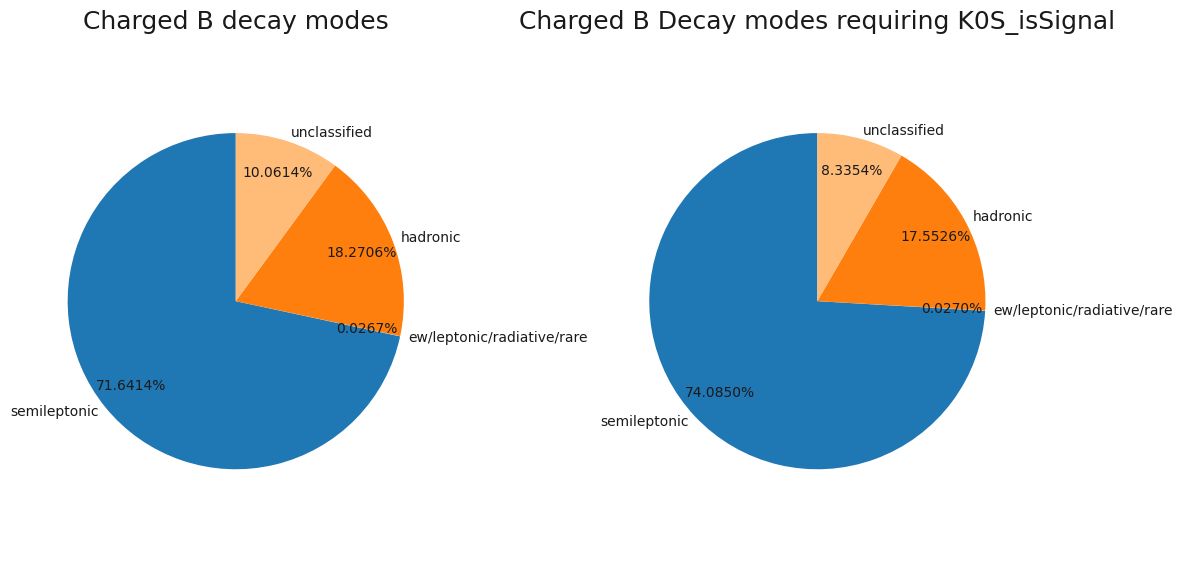

({'semileptonic': 71.6413752543973,
  'ew/leptonic/radiative/rare': 0.02669720723997307,
  'hadronic': 18.270562653315483,
  'unclassified': 10.061364885047244},
 {'semileptonic': 74.0850190559953,
  'ew/leptonic/radiative/rare': 0.026971562591615362,
  'hadronic': 17.55262386396951,
  'unclassified': 8.335385517443566})

In [3]:
#This is saying, there are no cases in the data where a k0s came from a non 2 pion decay? Correction? All correspond to true kaon from grabbed pions
#But we also have k0s where issignal was false, ie the 2 pions wern't from the same mother. So non properly reconstructed k0s where a k0s happened? 
#170550/172447 1897 1.10004813% deviation from Total k0s using issignal reconstruction, 170667 using is signal accept missing. Again it never calls a reconstruction that worked, a k0s when it isnt? ie, we never lose value in 
#is signal and issignalaccept missing when forced to agree with mcpdg. PDG not so much since we always assume k0s. 
#(np.int64(170550), np.int64(170550), np.int64(172447))

 # {'semi-leptonic': {'range': range(1001, 1081), 'events': 185160},
 #  'hadronic': {'range': [1081,
 #    1082,
 #    1083,
 #    1084,
 #    1798,
 #    1799,
 #    1800,
 #    1801,
 #    1802,
 #    1803,
 #    1804,
 #    1805,
 #    1806,
 #    1807,
 #    1808,
 #    1809,
 #    1810],
 #   'events': 47},
 #  'radiative decays': {'range': range(1085, 1093), 'events': 38},
 #  'electroweak penguin': {'range': range(1093, 1110), 'events': 10},
 #  'leptonic': {'range': range(1110, 1113), 'events': 21},
 #  'hadronic charmless': {'range': range(1113, 1609), 'events': 708},
 #  'charmonium': {'range': range(1609, 1680), 'events': 2664},
 #  'charm mesons': {'range': range(1680, 1798), 'events': 43469},
 #  'baryonic': {'range': range(1811, 1830), 'events': 333},
 #  'Null': {'range': [-99], 'events': 0},
 #  'daughters': {'range': range(0, 1001), 'events': 26004}})

# count_99 = df_chg['signalBplus'].value_counts().get(99, 0)
# count_neg99 = df_chg['signalBplus'].value_counts().get(-99, 0)
# count_99,count_neg99
    
    
# bp_counts = df_chg['signalBplus'].value_counts().head(mode_count) #grab top 25 counts for 25 decay modes in order descending
# labs = bp_counts.index #grab labels
# positions = np.arange(len(labs))*1.8 #Make bar plot positions
# counts1 = bp_counts.values 
# counts2 = df_chg['signalBminus'].abs().value_counts().reindex(labs, fill_value=0).values #if any bar is 0, then a top 25 Bminus mode is not in the top 25 BP modes
# width0 = 0.5

# total_events = sum(sector['events'] for sector in decay_sectors_bp.values())
# total_events
    
# k0ss_norm = k0ss / np.max(k0ss)
# fakes_norm = fakes / np.max(fakes)
# k0ss_bm_norm = k0ss_bm / np.max(k0ss_bm)
# fakes_bm_norm = fakes_bm / np.max(fakes_bm)

# fig0, ax0s = plt.subplots((7,2),figsize=(18,14))

# for i in range(14):
#     ax0s[i].bar(positions - width0/2, k0ss, width=width0, label='signalBP with True K0S', color='#0b3d91')
#     ax0s[i].bar(positions - width0/2, fakes, width=width0, bottom=k0ss, label='signalBP with Fake K0S', color='#87cefa')
#     ax0s[i].bar(positions + width0/2, k0ss_bm, width=width0, label='signalBM with True K0S', color='#d2691e')
#     ax0s[i].bar(positions + width0/2, fakes_bm, width=width0, bottom=k0ss_bm, label='signalBM with Fake K0S', color='#ffd700')


#Weight data for bargraph

# k0ss_norm2 = k0ss / np.max(k0ss)
# fakes_norm2 = fakes / np.max(fakes)
# k0ss_bm_norm2 = k0ss_bm / np.max(k0ss_bm)
# fakes_bm_norm2 = fakes_bm / np.max(fakes_bm)


# mislep

# df_chg[70:130]
# df_chg['McMatch_eSL'].sum()/len(df_chg['McMatch_eSL'])*100
# # 96.8539856 % of MC truth match simulation 
# mislep, counts1,effs,k0ss

# True count: 170667, K0S issignalacceptmissing/is signal is True, And mcPDG is a K0S
# False count: 1780, K0S_issignalacceptmis... And mcPDG disagree
#df_chg[60:80]
# df_chg['signalBplus'].value_counts()
# pairs

# df_chg.iloc[list(range(107, 110)) + list(range(356, 360))]
# #list(df_chg.columns)
# #df_signal = df_chg.query('isSignal == 1.0')
# #df_signal
# true_mask = (df_chg['K0S_isSignalAcceptMissing'] == 1) & (df_chg['K0S_mcPDG'] == 310)
# false_mask = ((df_chg['K0S_isSignalAcceptMissing'] == 0) & (df_chg['K0S_mcPDG'] == 310)) | \
#              ((df_chg['K0S_isSignalAcceptMissing'] == 1) & (df_chg['K0S_mcPDG'] != 310))

# true_count = true_mask.sum()
# false_count = false_mask.sum()

# print(f"True count: {true_count}")
# print(f"False count: {false_count}")

# import pdfplumber
# import re
# import pandas as pd

# with pdfplumber.open("BELLE2-NOTE-TE-2021-002.pdf") as pdf:
#     text = ""
#     for page in pdf.pages:
#         text += page.extract_text() + "\n"

# pattern = r'•\s*(.+?)\s*\+(\d{4})'
# matches = re.findall(pattern, text)

# decay_data = pd.DataFrame(matches, columns=["Decay Mode", "ID"])
# decay_data["ID"] = decay_data["ID"].astype(int)
# decay_data



labels_bpm = list(ovw_sigbpm.keys())
sizes_bpm = list(ovw_sigbpm.values())
colors_bpm = plt.cm.tab20.colors[:len(labels_bpm)]

labels_sigk0s = list(ovw_sigbpm_sigk0s.keys())
sizes_sigk0s = list(ovw_sigbpm_sigk0s.values())
colors_sigk0s = plt.cm.tab20.colors[:len(labels_sigk0s)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

wedges1, texts1, autotexts1 = ax1.pie(sizes_bpm, labels=labels_bpm, autopct='%.4f%%', startangle=90,
                                      pctdistance=0.8, labeldistance=1.05, colors=colors_bpm)
for text in texts1 + autotexts1:
    text.set_fontsize(10)


wedges2, texts2, autotexts2 = ax2.pie(sizes_sigk0s, labels=labels_sigk0s, autopct='%.4f%%', startangle=90,
                                      pctdistance=0.8, labeldistance=1.05, colors=colors_sigk0s)
for text in texts2 + autotexts2:
    text.set_fontsize(10)
ax1.set_title("Charged B decay modes")
ax2.set_title("Charged B Decay modes requiring K0S_isSignal")
ax1.axis('equal')
ax2.axis('equal')
plt.tight_layout()
plt.show()

# df_chg['K0S_isSignal'].sum(),df_chg['K0S_isSignalAcceptMissing'].sum(), sum(df_chg['K0S_mcPDG'] == 310), 170667, 1780, 172447
# (np.float64(170550.0), np.float64(170667.0), 172447, 170667, 1780, 172447), 258454 - 170550 is amount misidentified by issig, +1780 for amount actaully wrong. Ie. 86007
ovw_sigbpm, ovw_sigbpm_sigk0s 

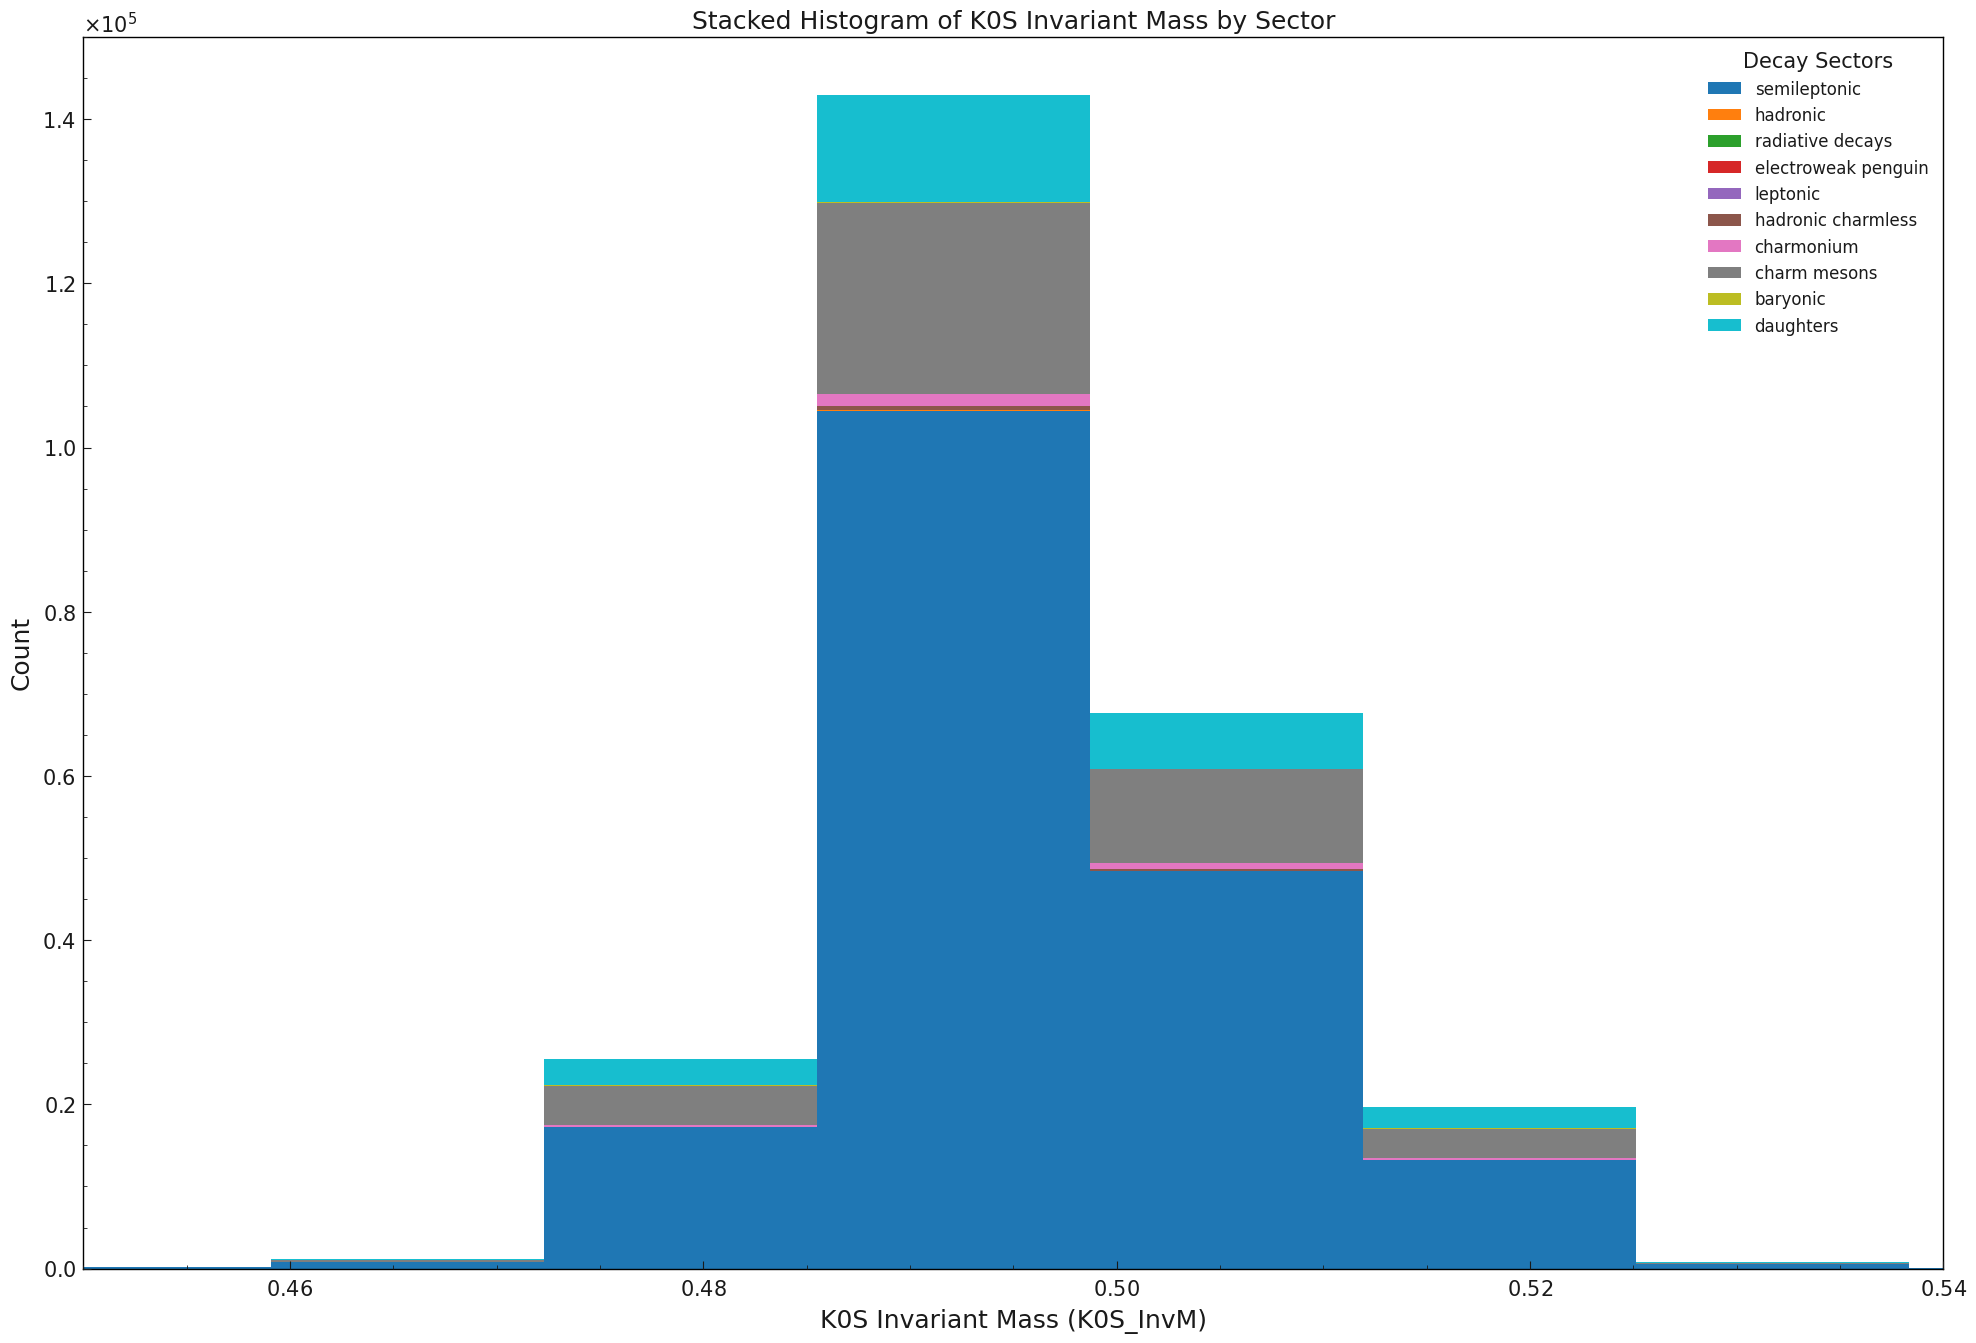

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sector_colors = [
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
    'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan',
]

fig, ax = plt.subplots(figsize=(24, 16))

sector_data = []
sector_names = [] 

for sector, (counts_dict, total_count, mask) in decays_bpm_sigk.items():
    if sector == 'null':
        continue
    filtered_df = df_chg[mask]
    
    data_for_sector = filtered_df['K0S_InvM'].dropna() 
    
    sector_data.append(data_for_sector)
    
    sector_names.append(sector)

ax.hist(sector_data, bins=30, stacked=True, label=sector_names, color=sector_colors)

ax.set_xlabel('K0S Invariant Mass (K0S_InvM)')
ax.set_ylabel('Count')
ax.set_title('Stacked Histogram of K0S Invariant Mass by Sector')
ax.set_xlim(0.45,0.54)
ax.legend(title="Decay Sectors")

plt.show()


C:\Users\Thomas\AppData\Local\Temp\ipykernel_26336\115468064.py:18: RangeWarning: Only 98.28% of data contained in the binning range [-2.0, 31.0].
  mhsa = [ph.make_hist(x, bins=binsa, weights=0.25) for x in [y1, y2, y3, y4,#y6,
C:\Users\Thomas\AppData\Local\Temp\ipykernel_26336\115468064.py:18: RangeWarning: Only 97.73% of data contained in the binning range [-2.0, 31.0].
  mhsa = [ph.make_hist(x, bins=binsa, weights=0.25) for x in [y1, y2, y3, y4,#y6,
C:\Users\Thomas\AppData\Local\Temp\ipykernel_26336\115468064.py:18: RangeWarning: Only 98.27% of data contained in the binning range [-2.0, 31.0].
  mhsa = [ph.make_hist(x, bins=binsa, weights=0.25) for x in [y1, y2, y3, y4,#y6,
C:\Users\Thomas\AppData\Local\Temp\ipykernel_26336\115468064.py:18: RangeWarning: Only 98.96% of data contained in the binning range [-2.0, 31.0].
  mhsa = [ph.make_hist(x, bins=binsa, weights=0.25) for x in [y1, y2, y3, y4,#y6,
C:\Users\Thomas\AppData\Local\Temp\ipykernel_26336\115468064.py:18: RangeWarning: On

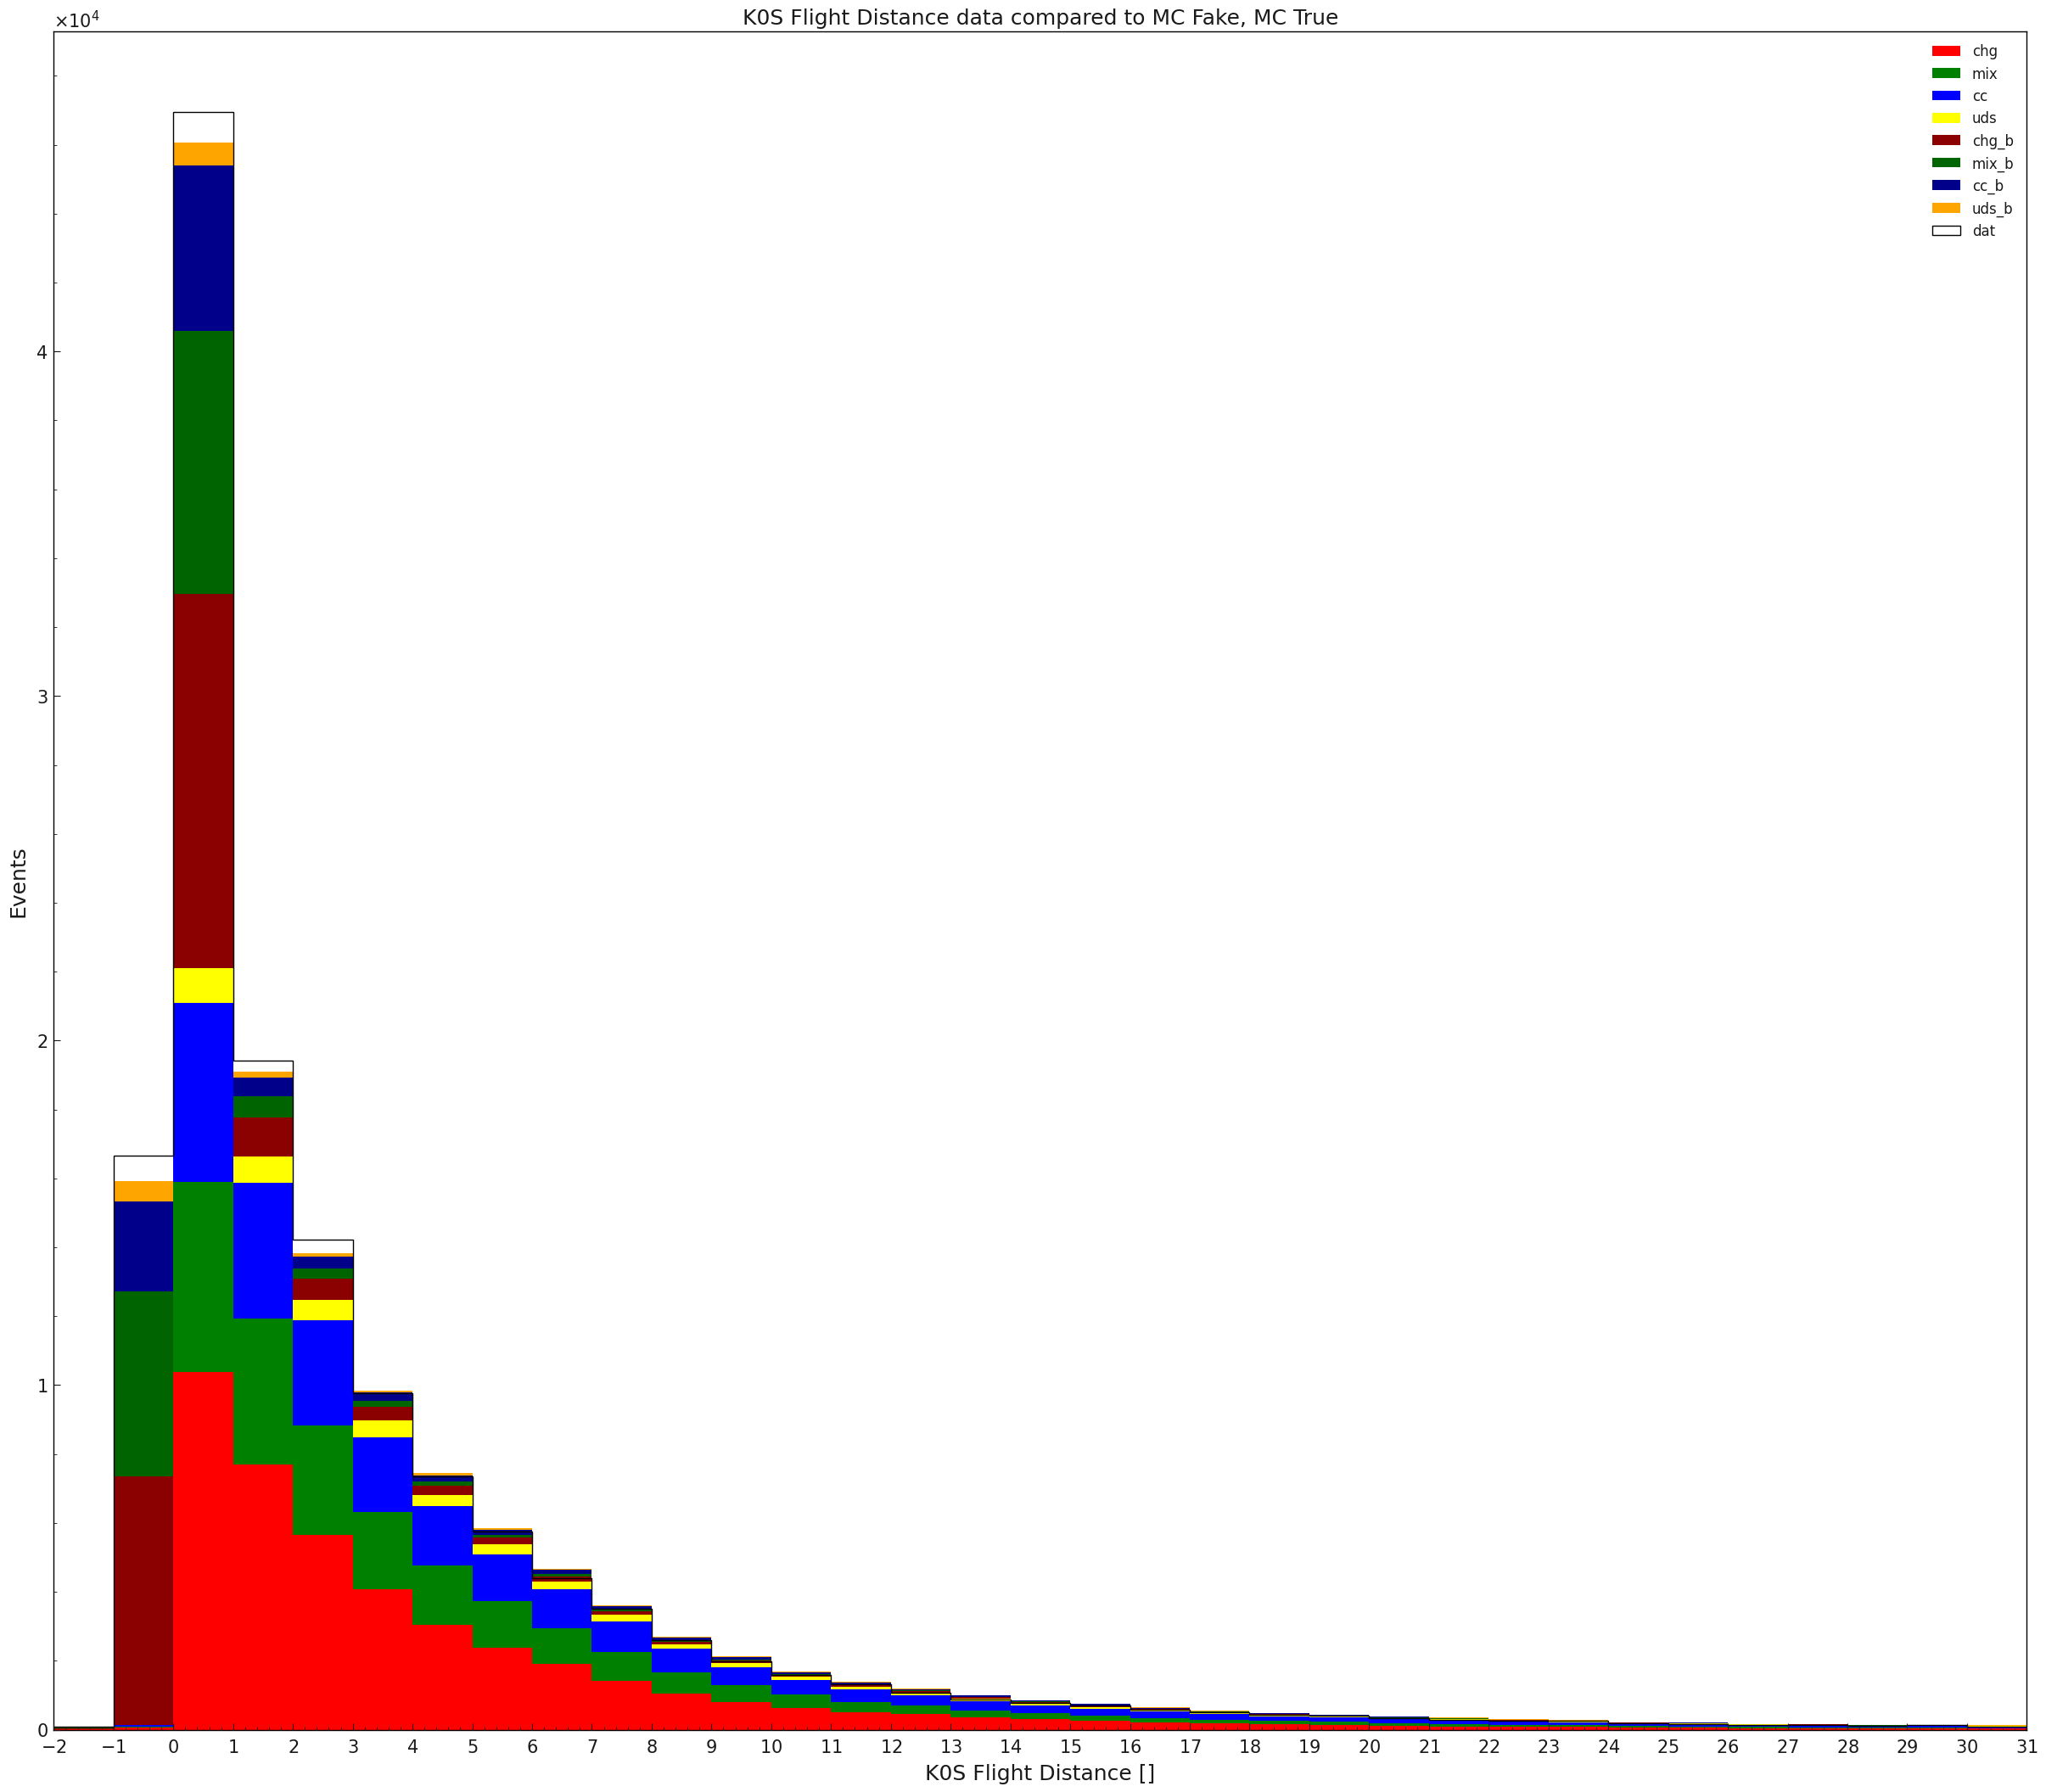

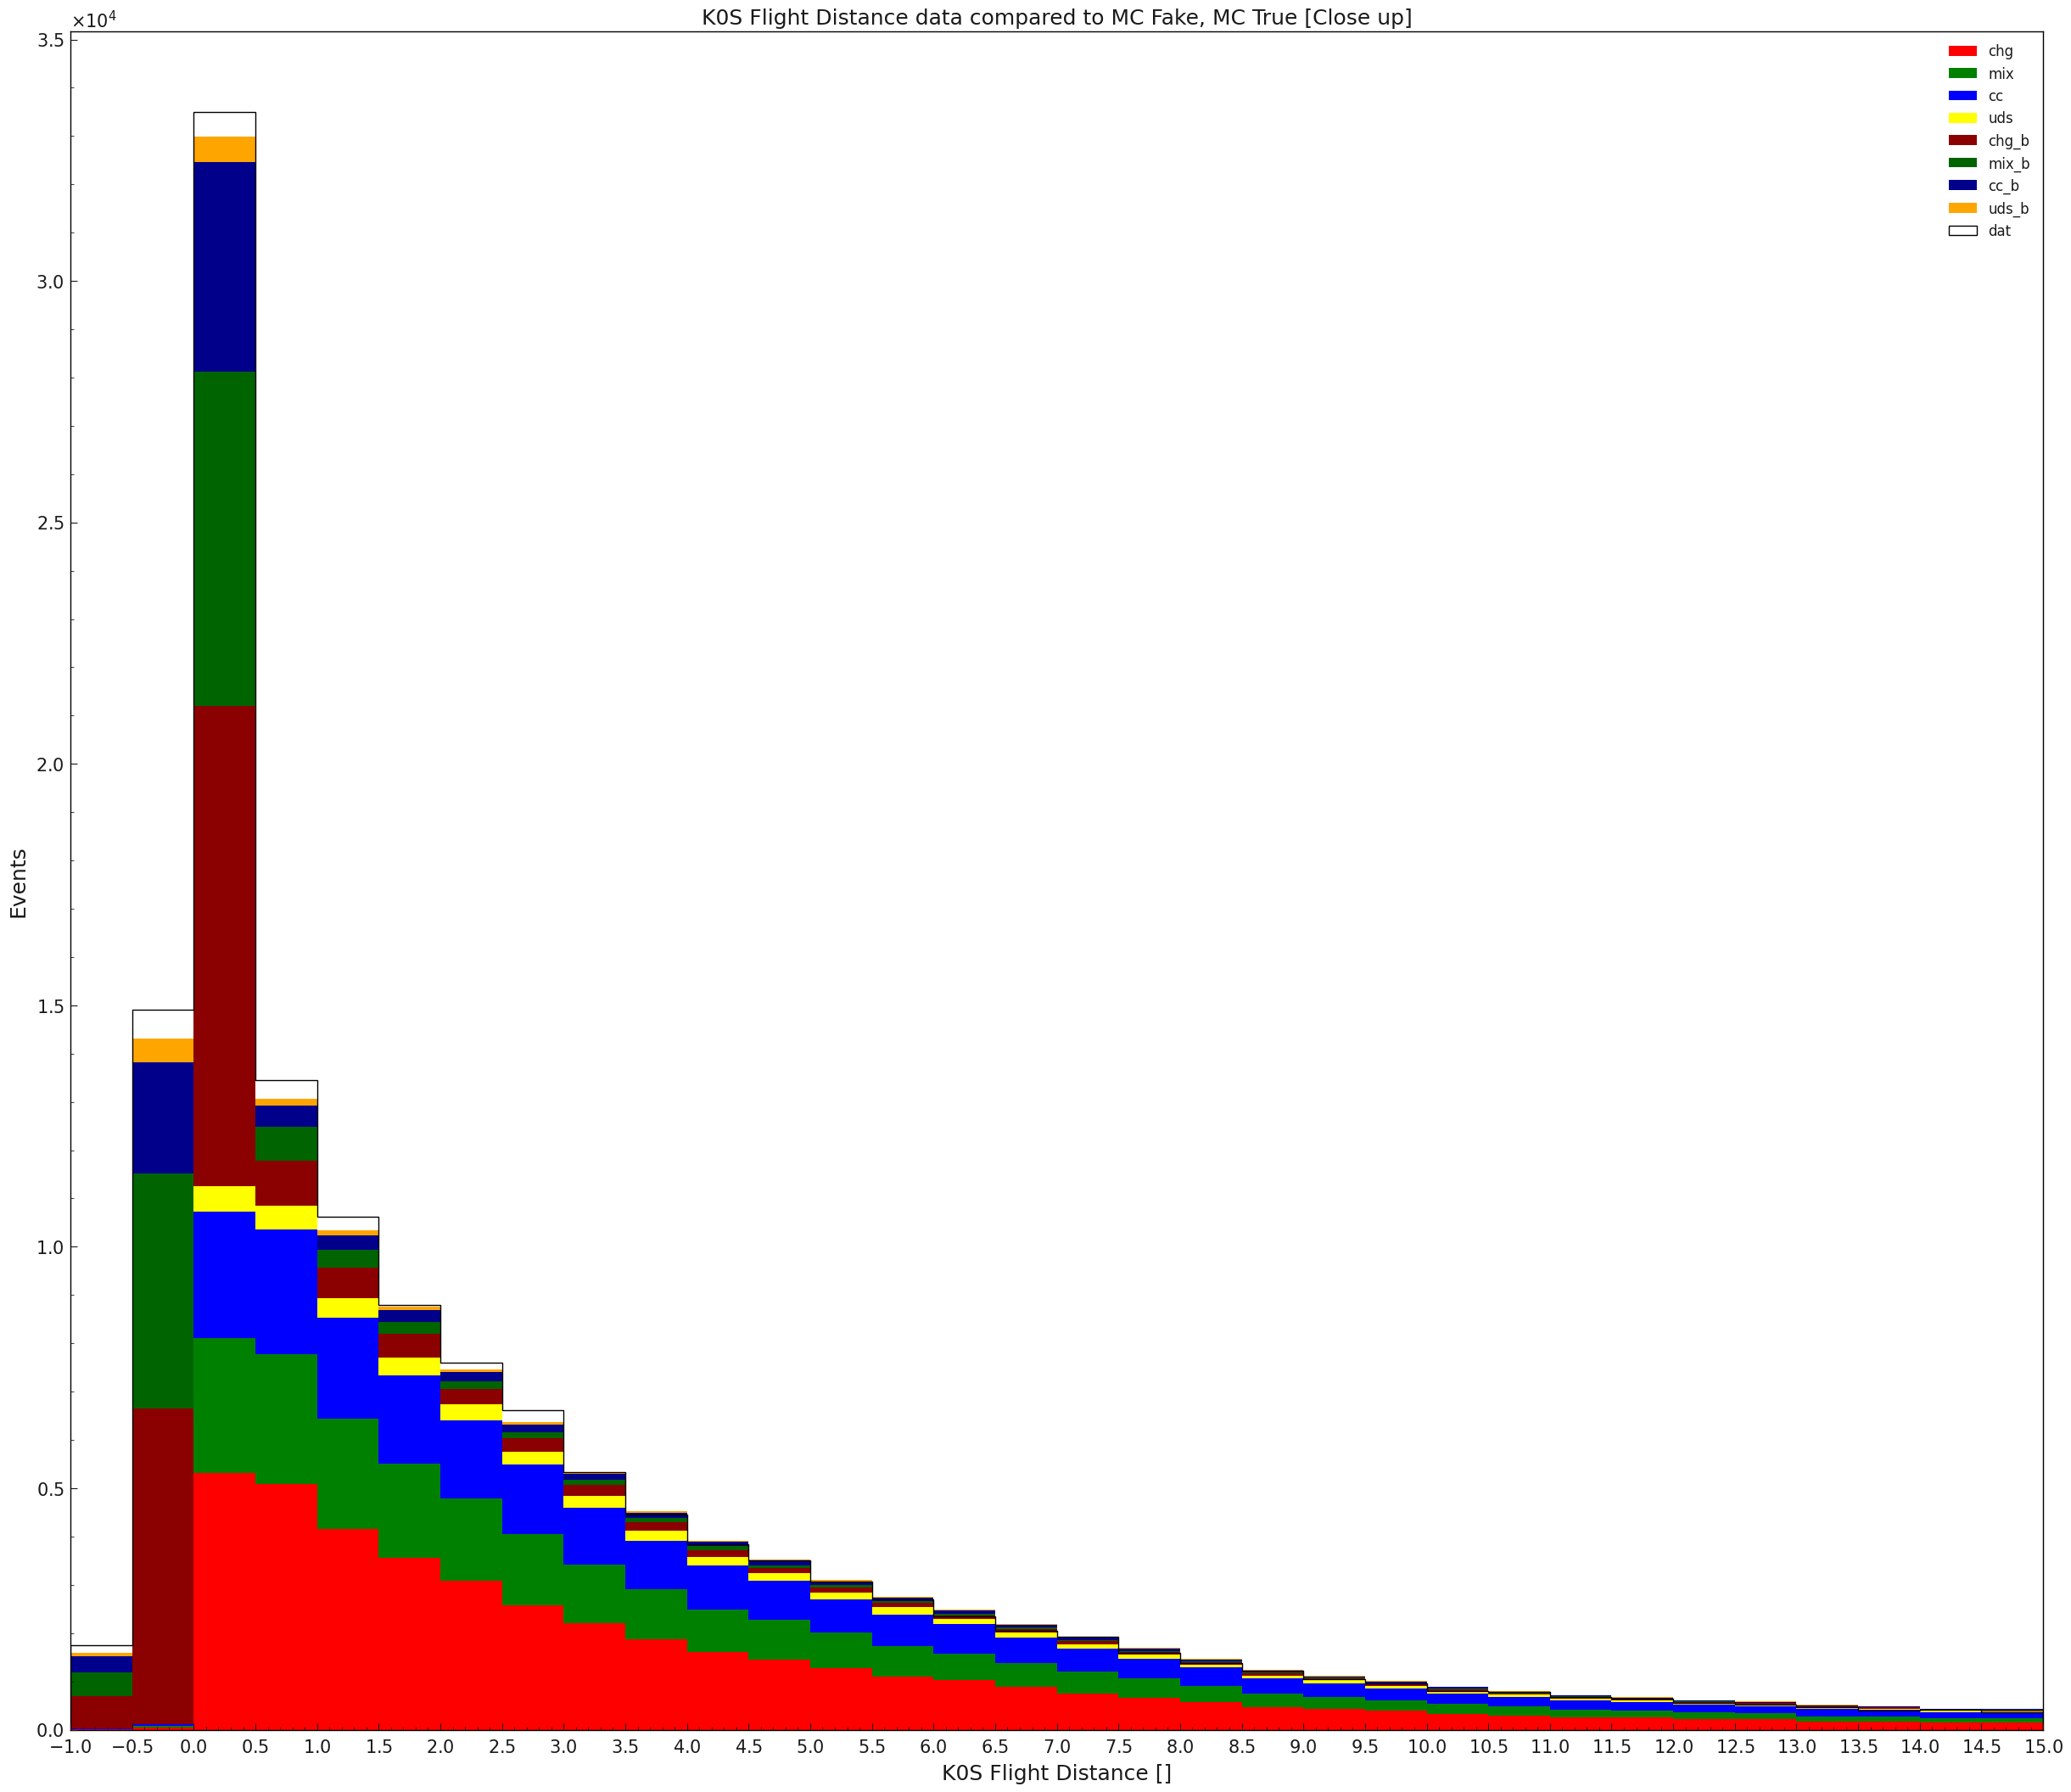

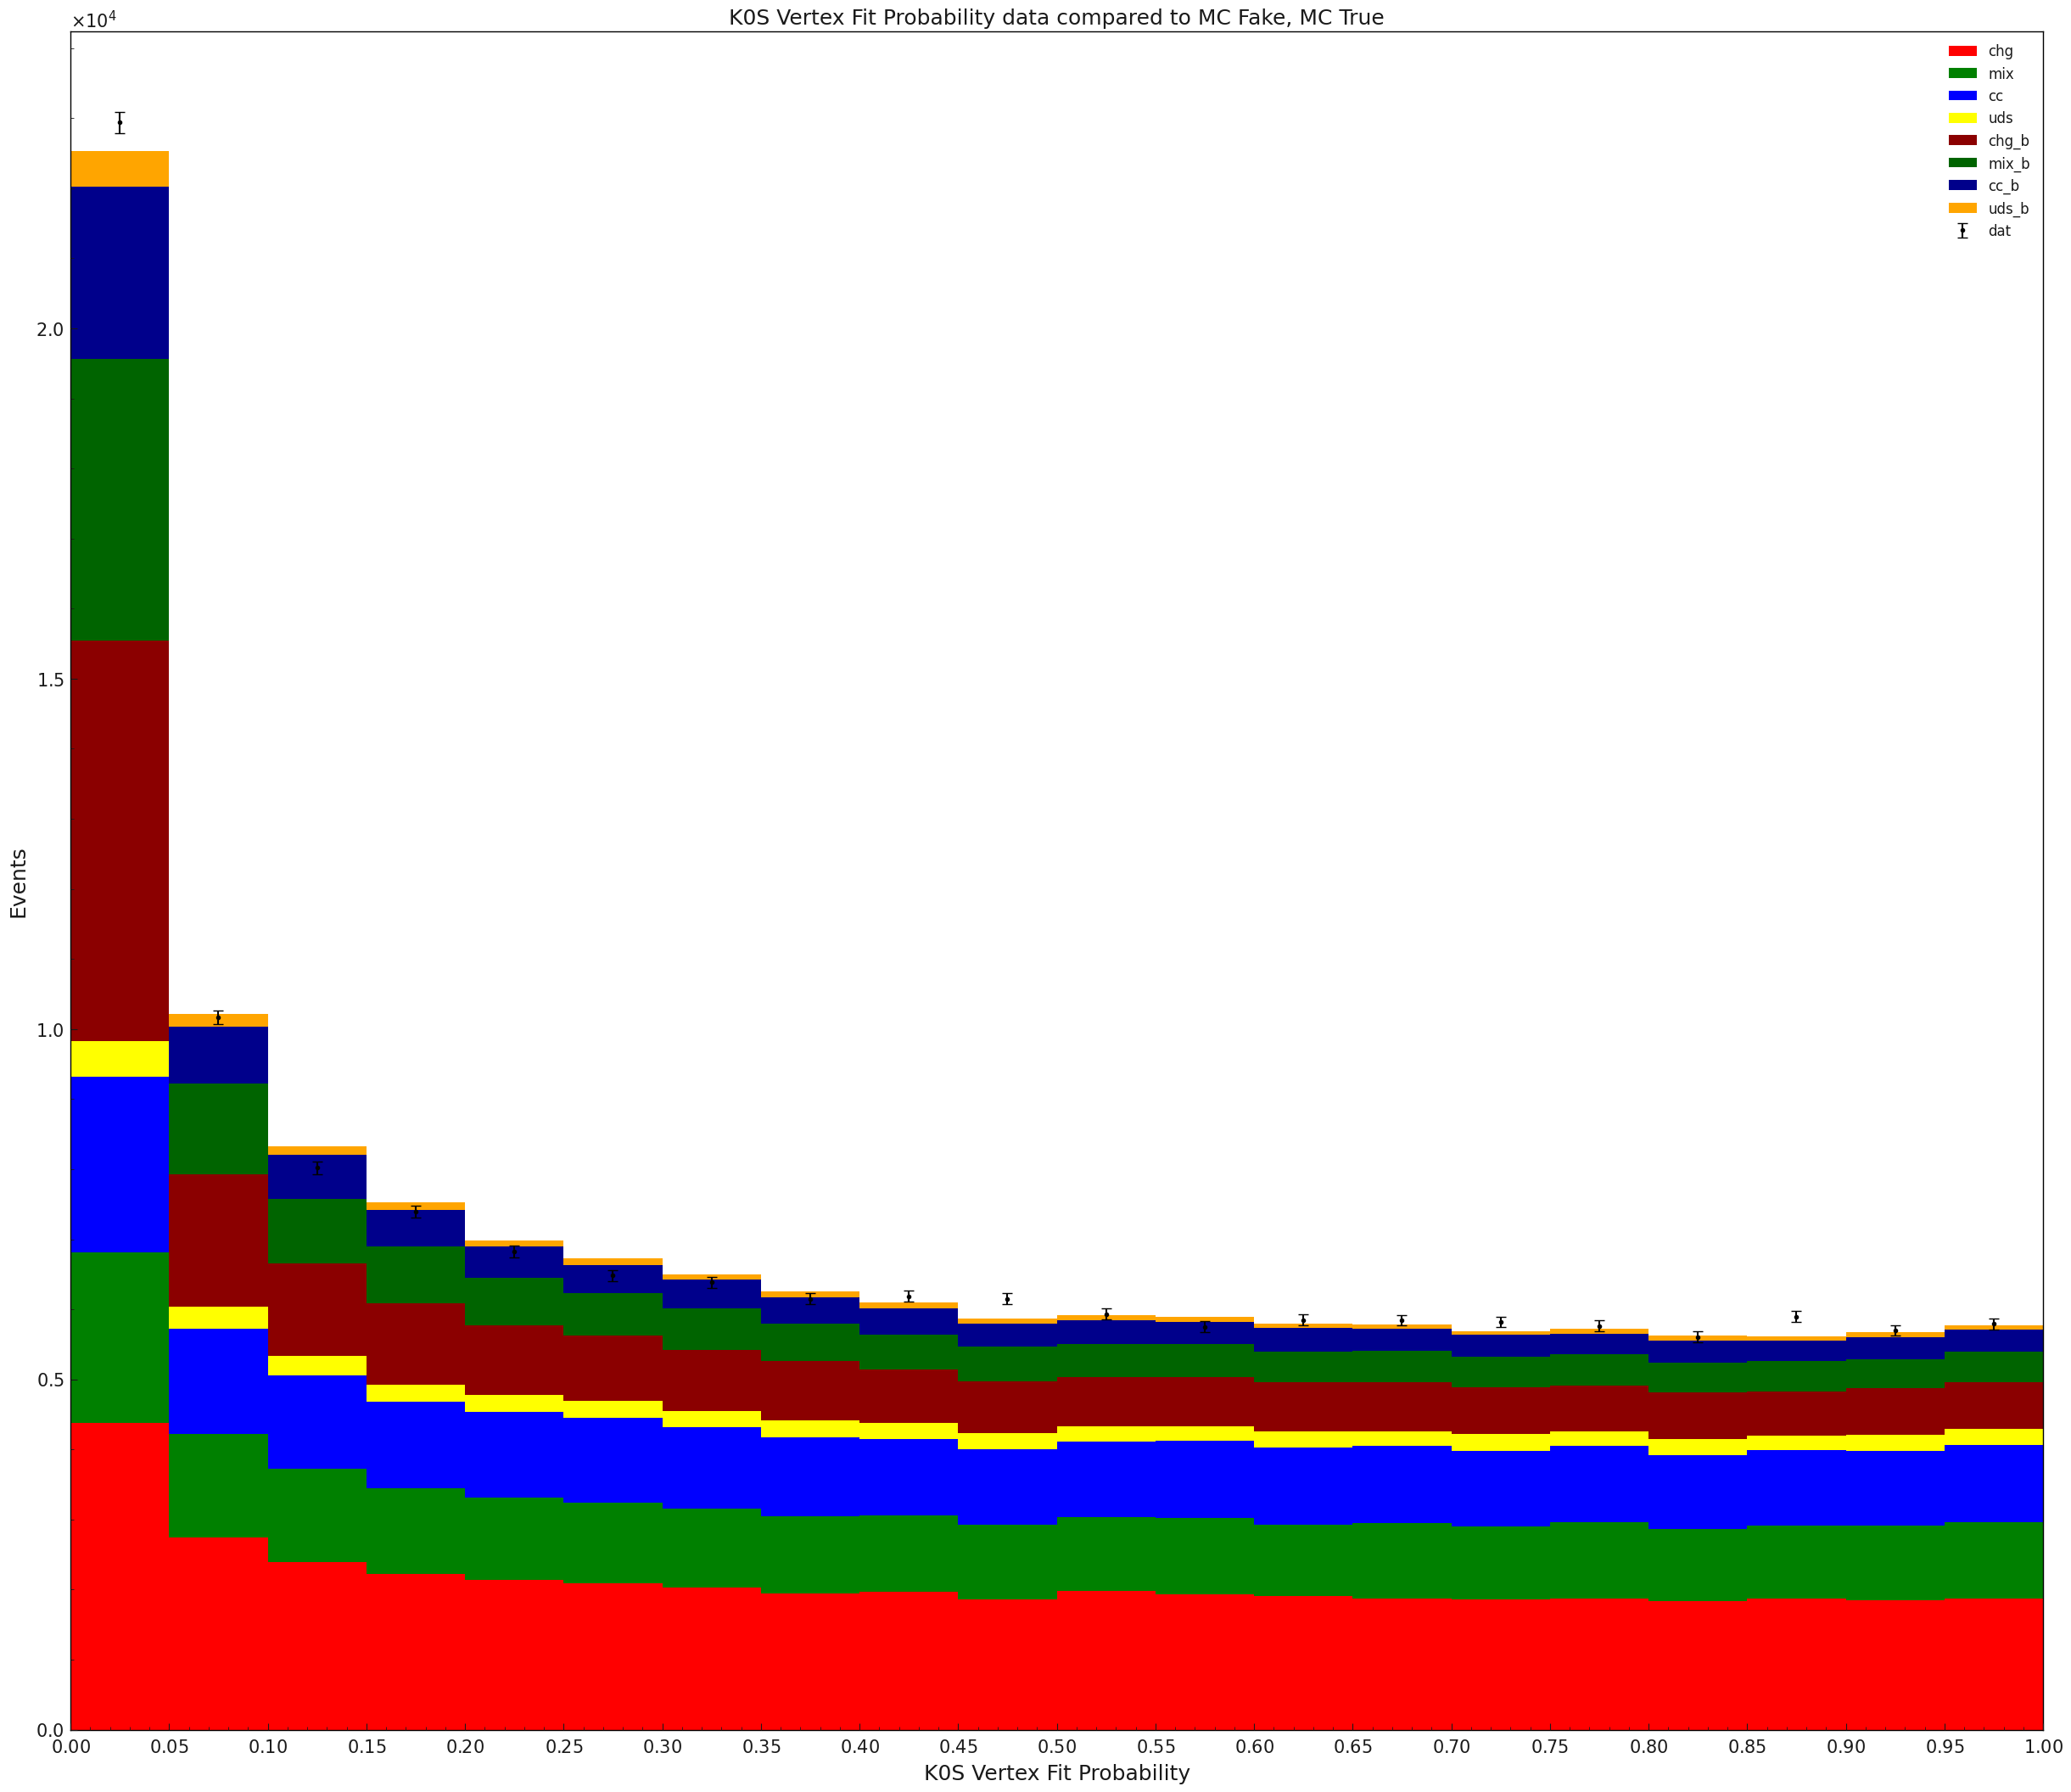

(np.float64(144491.25), np.float64(144643.0))

In [54]:
(figa, axa), (figb, axb) = (plt.subplots(figsize=(30, 26)), plt.subplots(figsize=(30, 26)))

binsa, binsb = np.arange(-2, 32, 1), np.arange(-1, 15.5, 0.5)  # Bin edges from -0.05 to 1.05 with a step of 0.05

y1 = df_chg.query('K0S_isSignal==1.0')['K0S_flightDistance']
y2 = df_mix.query('K0S_isSignal==1.0')['K0S_flightDistance'] #Note: Had to do != 1 instead of == 0 to get correct counts/total data!
y3 = df_cc.query('K0S_isSignal==1.0')['K0S_flightDistance']
y4 = df_uds.query('K0S_isSignal==1.0')['K0S_flightDistance']
#y6 = df_off.query('K0S_isSignal==1.0')['K0S_chiProb']

y1b = df_chg.query('K0S_isSignal!=1.0')['K0S_flightDistance']
y2b = df_mix.query('K0S_isSignal!=1.0')['K0S_flightDistance']
y3b = df_cc.query('K0S_isSignal!=1.0')['K0S_flightDistance']
y4b = df_uds.query('K0S_isSignal!=1.0')['K0S_flightDistance']
#y6b = df_off.query('K0S_isSignal!=1.0')['K0S_chiProb']
y5 = df_dat['K0S_flightDistance']

mhsa = [ph.make_hist(x, bins=binsa, weights=0.25) for x in [y1, y2, y3, y4,#y6,
                                                           y1b, y2b, y3b, y4b,]] #y6b]]
mhsb = [ph.make_hist(x, bins=binsb, weights=0.25) for x in [y1, y2, y3, y4,#y6,
                                                           y1b, y2b, y3b, y4b,]] #y6b]]
mh2a = ph.make_hist(y5, bins=binsa)
mh2b = ph.make_hist(y5, bins=binsb)

ph.plot_hist(mhsa, ax=axa, stacked=True, color=['red', 'green', 'cyan', 'yellow',#'grey',
                                               'darkred', 'darkgreen', 'blue', 'orange'],#'black'], 
             label=['chg', 'mix', 'cc', 'uds',#'off',
                    'chg_b', 'mix_b', 'cc_b', 'uds_b','offb'])

ph.plot_error_hist(mh2a, ax=axa, label='dat', color='black', capsize=4)

axa.set_xlabel('K0S Flight Distance []')
axa.set_ylabel('Events')
axa.set_title('K0S Flight Distance data compared to MC Fake, MC True')

axb.set_xlabel('K0S Flight Distance []')
axb.set_ylabel('Events')
axb.set_title('K0S Flight Distance data compared to MC Fake, MC True [Close up]')

axa.set_xlim(-2, 31)
axa.set_xticks(binsa)
axa.legend()

ph.plot_hist(mhsb, ax=axb, stacked=True, color=['red', 'green', 'cyan', 'yellow',#'grey',
                                               'darkred', 'darkgreen', 'blue', 'orange'],#'black'], 
             label=['chg', 'mix', 'cc', 'uds',#'off',
                    'chg_b', 'mix_b', 'cc_b', 'uds_b','offb'])

ph.plot_error_hist(mh2b, ax=axb, label='dat', color='black', capsize=4)

axb.set_xlim(-1, 15)
axb.set_xticks(binsb)
axb.legend()

figc, axc = plt.subplots(figsize=(30, 26))

binsc = np.arange(0.0, 1.01, 0.05)  # Bin edges from -0.05 to 1.05 with a step of 0.05

x1 = df_chg.query('K0S_isSignal==1.0')['K0S_chiProb']
x2 = df_mix.query('K0S_isSignal==1.0')['K0S_chiProb'] #Note: Had to do != 1 instead of == 0 to get correct counts/total data!
x3 = df_cc.query('K0S_isSignal==1.0')['K0S_chiProb']
x4 = df_uds.query('K0S_isSignal==1.0')['K0S_chiProb']
#x6 = df_off.query('K0S_isSignal==1.0')['K0S_chiProb']

x1b = df_chg.query('K0S_isSignal!=1.0')['K0S_chiProb']
x2b = df_mix.query('K0S_isSignal!=1.0')['K0S_chiProb']
x3b = df_cc.query('K0S_isSignal!=1.0')['K0S_chiProb']
x4b = df_uds.query('K0S_isSignal!=1.0')['K0S_chiProb']
#x6b = df_off.query('K0S_isSignal!=1.0')['K0S_chiProb']

x5 = df_dat['K0S_chiProb']

mhs = [ph.make_hist(x, bins=binsc, weights=0.25) for x in [x1, x2, x3, x4,#x6,
                                                           x1b, x2b, x3b, x4b,]] #x6b]]
mh2 = ph.make_hist(x5, bins=binsc)

ph.plot_hist(mhs, ax=axc, stacked=True, color=['red', 'green', 'cyan', 'yellow',#'grey',
                                               'darkred', 'darkgreen', 'blue', 'orange'],#'black'], 
             label=['chg', 'mix', 'cc', 'uds',#'off',
                    'chg_b', 'mix_b', 'cc_b', 'uds_b','offb'])

ph.plot_error_hist(mh2, ax=axc, label='dat', color='black',capsize=4)

axc.set_xlabel('K0S Vertex Fit Probability')
axc.set_ylabel('Events')
axc.set_title('K0S Vertex Fit Probability data compared to MC Fake, MC True')

xticks = binsc
axc.set_xticks(xticks)
axc.set_xlim(0,1)

axc.legend()
plt.show()
sum(sum(x.counts() for x in mhs)), sum(mh2.counts())